If you do not have these libraries, you can install them via pip.

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 800 kB/s 
     |████████████████████████████████| 6.4 MB 44.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


We need to load the following libraries:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_log_error,mean_absolute_error

In [4]:
from keras.models import Sequential
from keras.layers import Dropout,Dense,BatchNormalization ,LSTM ,GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

In [5]:
import yfinance as yf
import datetime as time

get data as yahoo finance

In [6]:
btc_data=yf.download("BTC-USD",start='2014-09-17',stop=time.date.today())

[*********************100%***********************]  1 of 1 completed


In [7]:
min_date = str(btc_data.index.min())
max_date = str(btc_data.index.max())
print("We have collected Bitcoin stock price data from %s to %s (today)" %( min_date , max_date))

We have collected Bitcoin stock price data from 2014-09-17 00:00:00 to 2022-07-08 00:00:00 (today)


see the data shape

In [8]:
print("our data have %d rows and %d columns(Features)"%(btc_data.shape[0],btc_data.shape[1]))

our data have 2852 rows and 6 columns(Features)


In [9]:
btc_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [10]:
btc_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2.852000e+03
mean,12438.445471,12762.284354,12074.918764,12444.167710,12444.167710,1.543296e+10
std,16581.359304,17009.706219,16084.298465,16576.975235,16576.975235,1.991359e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,635.306519,641.894257,625.045227,636.637512,636.637512,8.639670e+07
50%,6566.449951,6672.479980,6452.399902,6572.459961,6572.459961,5.853965e+09
75%,11529.242188,11816.213135,11286.059326,11545.715820,11545.715820,2.627581e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [11]:
btc_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2852 entries, 2014-09-17 to 2022-07-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2852 non-null   float64
 1   High       2852 non-null   float64
 2   Low        2852 non-null   float64
 3   Close      2852 non-null   float64
 4   Adj Close  2852 non-null   float64
 5   Volume     2852 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 156.0 KB


In [12]:
print(btc_data.isna().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [13]:
print("The dataset contains %d duplicate data"%(btc_data.duplicated().sum()))

The dataset contains 0 duplicate data


Text(1.0, 1.0, 'low values')

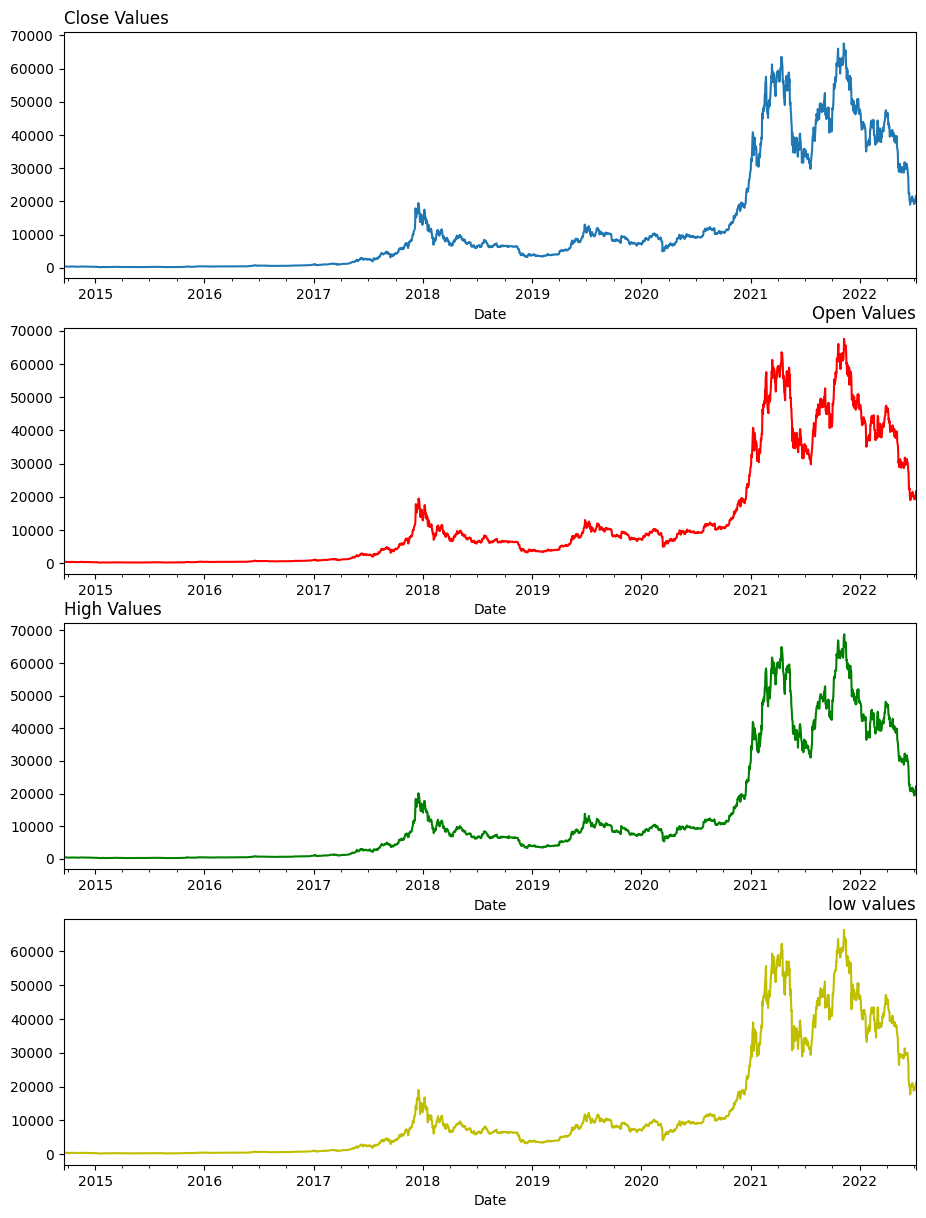

In [14]:
plt.figure(figsize=(11,15),dpi=100)
plt.subplot(411)
btc_data.Close.plot()
plt.title("Close Values",loc="left")
plt.subplot(412)
btc_data.Open.plot(c="r")
plt.title("Open Values",loc="right")
plt.subplot(413)
btc_data.High.plot(c="g")
plt.title("High Values",loc="left")
plt.subplot(414)
btc_data.Low.plot(c="y")
plt.title("low values",loc="right")

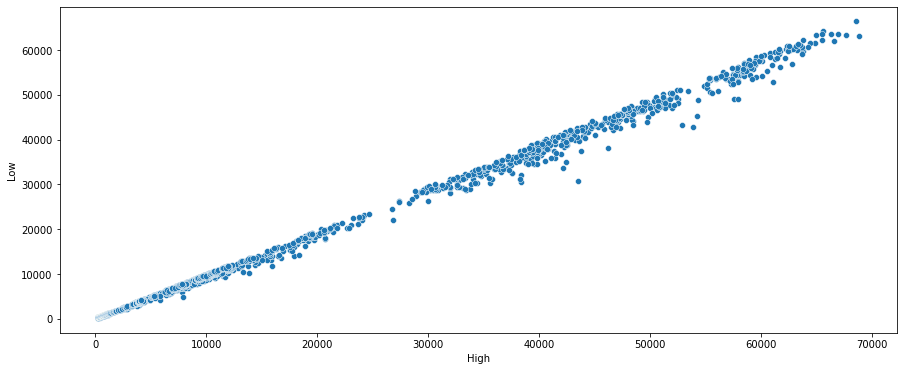

In [15]:
plt.figure(figsize=(15,6))
sns.scatterplot(x= btc_data.High, y= btc_data.Low)

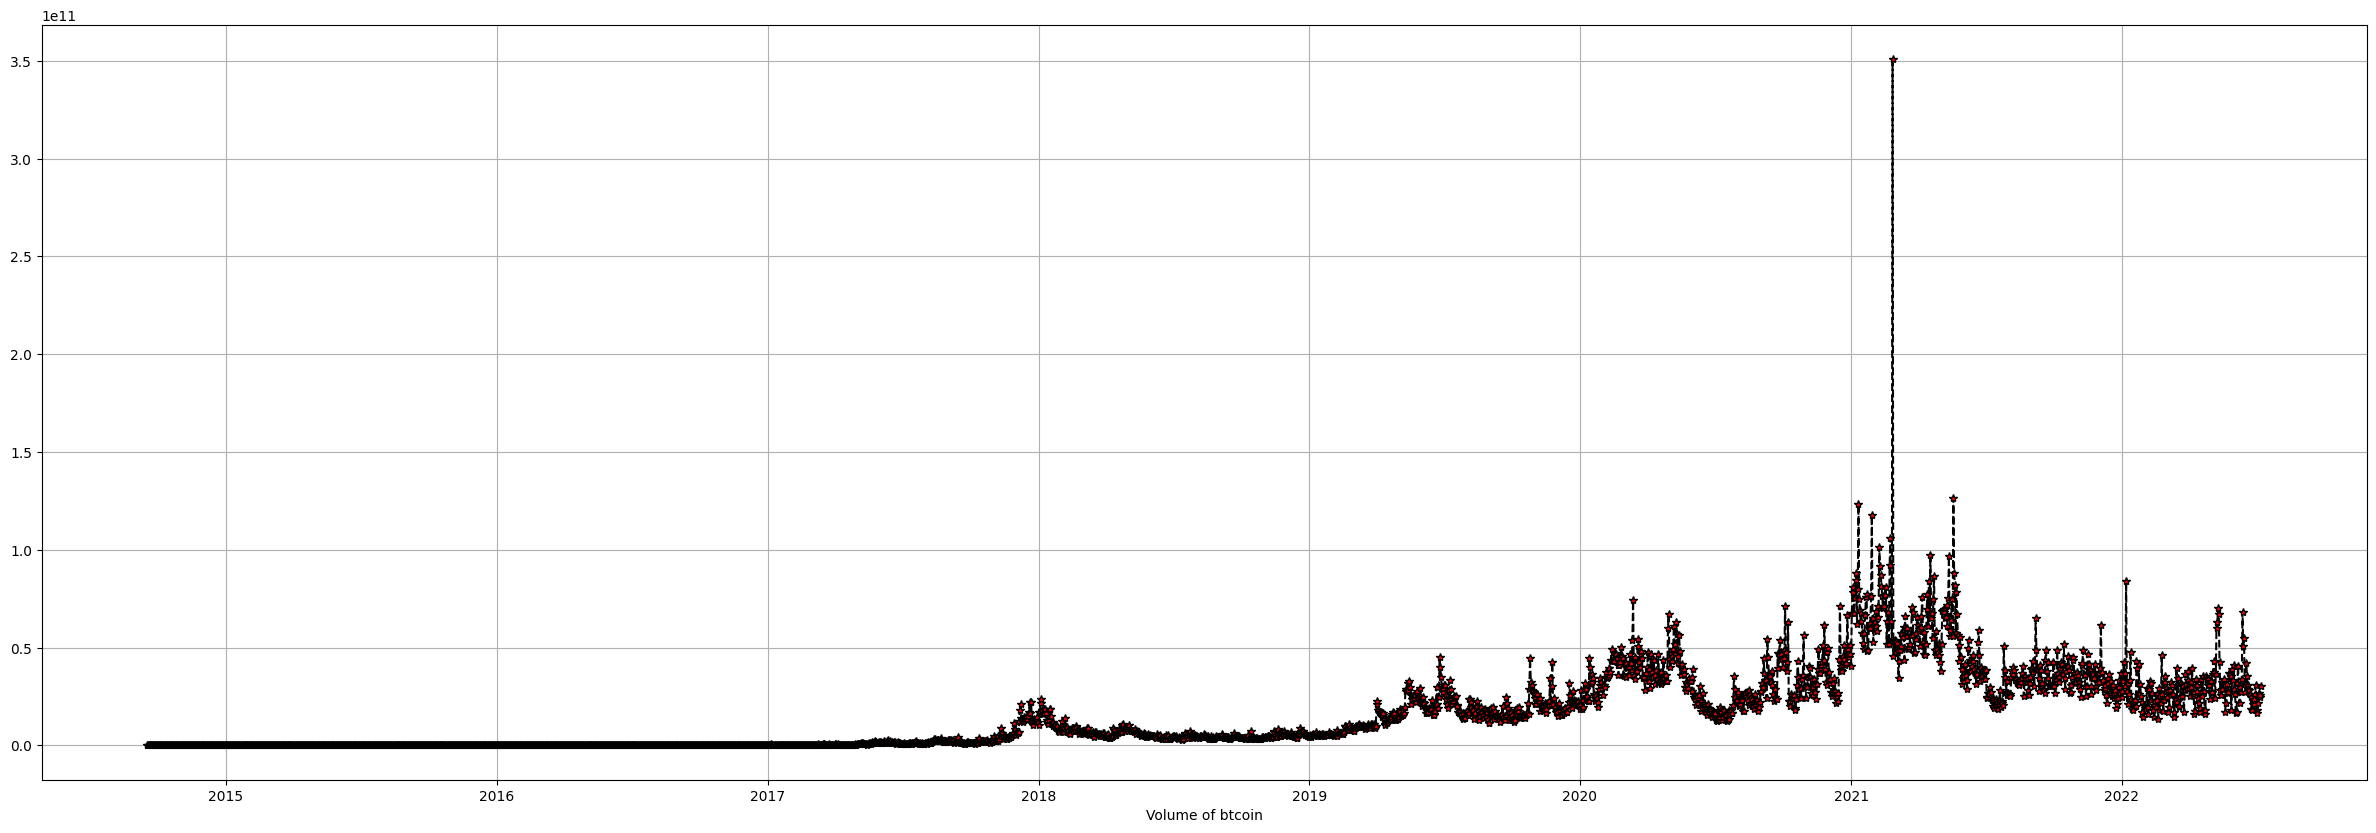

In [16]:
plt.figure(figsize = (30,10),dpi = 100)  
plt.plot(btc_data["Volume"],linestyle = "--" , color = "k",marker = "*",markerfacecolor = "red")
plt.xlabel("Volume of btcoin")
plt.grid()

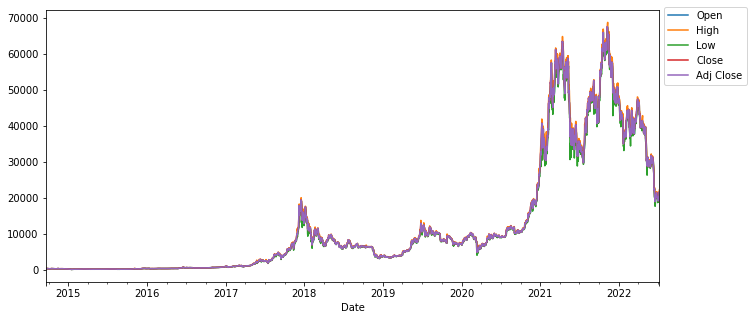

In [17]:
btc_data.drop("Volume" , axis = 1).plot(figsize = (11,5))
plt.legend(bbox_to_anchor=(1,1.03))

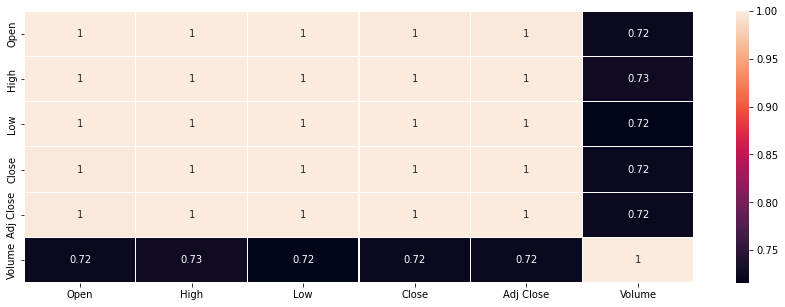

In [18]:
plt.figure(figsize = (15,5))
c_df = btc_data.corr()
sns.heatmap(c_df ,annot =True , linewidths =0.1 )

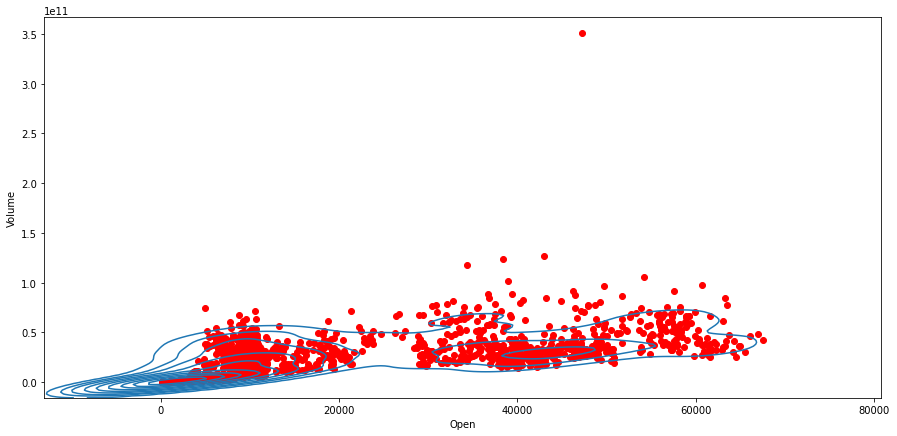

In [19]:
plt.figure(figsize = (15,7))
sns.kdeplot(x ="Open" ,y ="Volume" ,data =btc_data)
plt.scatter(btc_data["Open"], btc_data["Volume"],color = "red")

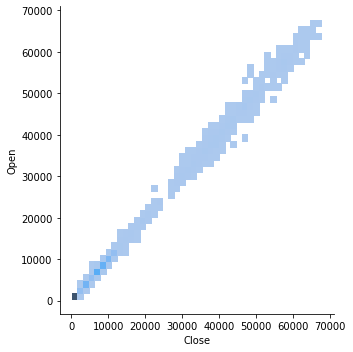

In [20]:
sns.displot(data = btc_data ,x =btc_data["Close"], y =btc_data["Open"])

In [21]:
fig = px.line(x= btc_data.index.values , y= btc_data["Low"])
fig.add_bar(x= btc_data.index.values , y= btc_data["High"])
fig.add_scatter(x= btc_data.index.values , y= btc_data["High"])
fig.add_bar(x= btc_data.index.values , y= btc_data["Low"])
fig.update_layout(font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="green")
fig.update_xaxes(title_font_family="Arial")

train test split

In [22]:
x = btc_data.drop("Close",axis=1)
y = btc_data.Close
x_full_train,x_test,y_full_train,y_test = train_test_split(x,y,test_size=0.2)

validation data

In [23]:
x_train,x_val,y_train,y_val=train_test_split(x_full_train,y_full_train,test_size=0.2)

In [49]:
print("shape of x train  is :",x_train.shape)
print("shape of y train is  :", y_train.shape)

print("shape of x test is  :", x_test.shape)
print("shape of y test is  :", y_test.shape)


print("shape of x val is  :", x_val.shape)
print("shape of y val is  :", y_val.shape)


shape of x train  is : (1824, 5)
shape of y train is  : (1824,)
shape of x test is  : (571, 5)
shape of y test is  : (571,)
shape of x val is  : (457, 5)
shape of y val is  : (457,)


Construction of neural network(ann)

In [24]:
ann_model = Sequential()
ann_model.add(Dense(45,activation="relu"))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(60,activation="linear"))
ann_model.add(BatchNormalization())
ann_model.add(Dense(40,activation="relu"))
ann_model.add(Dense(1,activation="linear"))

compile NN

In [25]:
ann_model.compile(optimizer="adam",loss="mean_squared_error")

Training neural network with data

In [26]:
history = ann_model.fit(x_train,y_train,epochs=100,batch_size=32,validation_data=(x_val,y_val))

Epoch 1/100
57/57 [==============================] - 2s 14ms/step - loss: 432726560.0000 - val_loss: 414122880.0000
Epoch 2/100
57/57 [==============================] - 0s 6ms/step - loss: 431984064.0000 - val_loss: 411991200.0000
Epoch 3/100
57/57 [==============================] - 0s 6ms/step - loss: 430225376.0000 - val_loss: 408708032.0000
Epoch 4/100
57/57 [==============================] - 0s 8ms/step - loss: 427080576.0000 - val_loss: 404012960.0000
Epoch 5/100
57/57 [==============================] - 0s 6ms/step - loss: 422147392.0000 - val_loss: 397543776.0000
Epoch 6/100
57/57 [==============================] - 0s 8ms/step - loss: 414930240.0000 - val_loss: 389135904.0000
Epoch 7/100
57/57 [==============================] - 0s 7ms/step - loss: 405842240.0000 - val_loss: 378600448.0000
Epoch 8/100
57/57 [==============================] - 0s 8ms/step - loss: 393904256.0000 - val_loss: 365582272.0000
Epoch 9/100
57/57 [==============================] - 0s 6ms/step - loss: 378650

Schematic drawing of the model

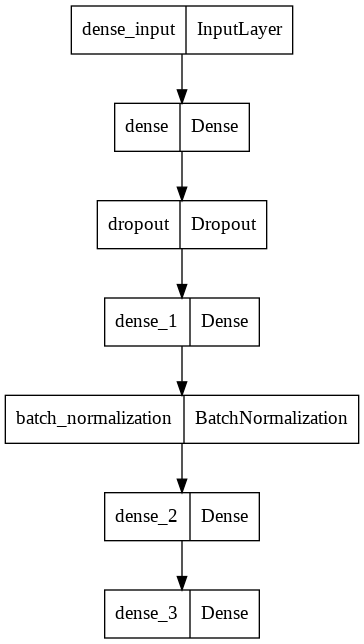

In [27]:
plot_model(ann_model)

Drawing a graph of the process of changing the error rate of the model in each epoch of training:

1. The error rate on the training data has gradually decreased

2. The error rate on the validation data has gradually decreased  
  


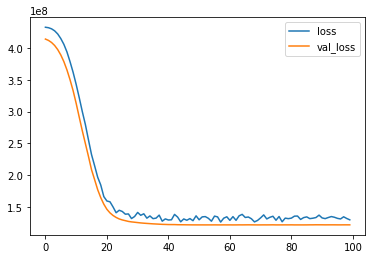

In [28]:
pd.DataFrame(history.history).plot()

predict:

In [29]:
y_pred = ann_model.predict(x_test)
y_=pd.DataFrame(data=y_pred,index=y_test.index,columns=["y_pred"])
y_["y_test"]=y_test.values


In [30]:
y_.sort_index(inplace =True)

In [31]:
fig = px.bar(x= y_.index.values , y= y_["y_test"])
fig.add_scatter(x= y_.index.values , y= y_["y_test"])

In [32]:
fig = px.bar(x= y_.index.values , y= y_["y_pred"])
fig.add_scatter(x= y_.index.values , y= y_["y_pred"])

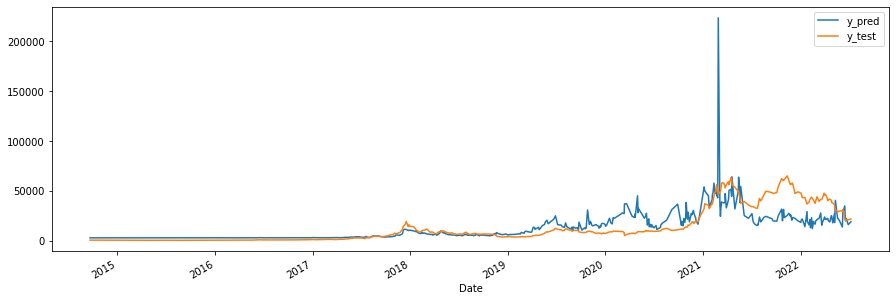

In [33]:
y_.plot(figsize = (15,5))

Claculation model error using different metrics:

1.   r2_score
2.   mean_squared_log_error
3.   mean_absolute_error

In [36]:
print("r2 score:" ,r2_score(y_["y_test"],y_["y_pred"]))
print("mean squared error: ", mean_squared_log_error(y_["y_test"],y_["y_pred"]))
print("mean absolute erroe:",mean_absolute_error(y_["y_test"],y_["y_pred"]))

r2 score: 0.41847678786171216
mean squared error:  1.5488928198734415
mean absolute erroe: 6852.553716709652


Create and fit the LSTM network

In [52]:
lstm_model = Sequential()
lstm_model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
lstm_model.add(LSTM(15))
lstm_model.add(Dense(30))
lstm_model.add(Dropout(0.25))
lstm_model.add(Dense(1))

In [53]:
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

In [54]:
history = lstm_model.fit(x_train,y_train,epochs=100,batch_size=32,validation_data=(x_val,y_val))


Epoch 1/100
57/57 [==============================] - 5s 30ms/step - loss: 432775520.0000 - val_loss: 414930464.0000
Epoch 2/100
57/57 [==============================] - 1s 10ms/step - loss: 432450720.0000 - val_loss: 414526944.0000
Epoch 3/100
57/57 [==============================] - 1s 9ms/step - loss: 431964288.0000 - val_loss: 413990848.0000
Epoch 4/100
57/57 [==============================] - 1s 10ms/step - loss: 431317408.0000 - val_loss: 413293920.0000
Epoch 5/100
57/57 [==============================] - 1s 9ms/step - loss: 430486080.0000 - val_loss: 412405792.0000
Epoch 6/100
57/57 [==============================] - 1s 9ms/step - loss: 429495744.0000 - val_loss: 411358080.0000
Epoch 7/100
57/57 [==============================] - 1s 9ms/step - loss: 428322624.0000 - val_loss: 410144800.0000
Epoch 8/100
57/57 [==============================] - 1s 14ms/step - loss: 426968608.0000 - val_loss: 408774592.0000
Epoch 9/100
57/57 [==============================] - 1s 14ms/step - loss: 42

Schematic drawing of the model

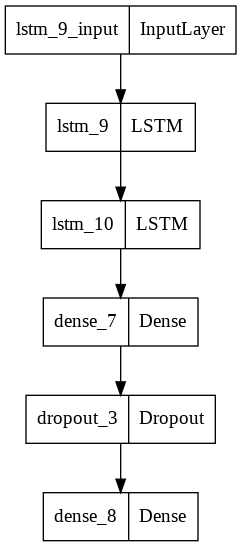

In [57]:
plot_model(lstm_model)

Drawing a graph of the process of changing the error rate of the model in each epoch of training:

1. The error rate on the training data has gradually decreased

2. The error rate on the validation data has gradually decreased  
  


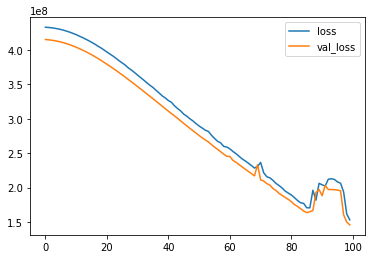

In [58]:
pd.DataFrame(history.history).plot()

make predictions

In [61]:
y_pred = lstm_model.predict(x_test)
y_lstm=pd.DataFrame(data=y_pred,index=y_test.index,columns=["y_pred"])
y_lstm["y_test"]=y_test.values
y_lstm.sort_index(inplace =True)

In [63]:
fig = px.bar(x= y_lstm.index.values , y= y_lstm["y_pred"])
fig.add_scatter(x= y_lstm.index.values , y= y_lstm["y_pred"])

fig.add_bar(x= y_lstm.index.values , y= y_lstm["y_test"])
fig.add_scatter(x= y_lstm.index.values , y= y_lstm["y_test"])

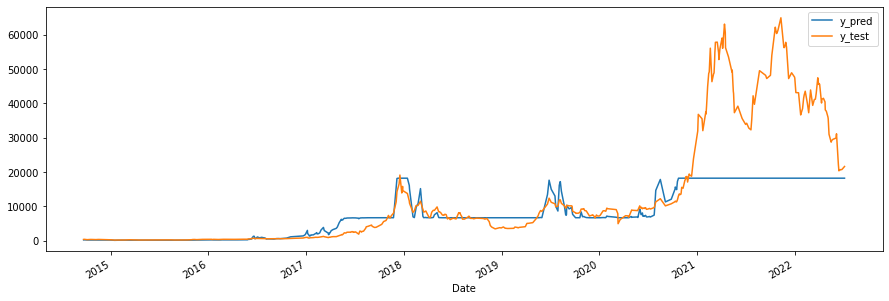

In [64]:
y_lstm.plot(figsize = (15,5))

Claculation model error using different metrics:

1.   r2_score
2.   mean_squared_log_error
3.   mean_absolute_error

In [65]:
print("r2 score:" ,r2_score(y_lstm["y_test"],y_lstm["y_pred"]))
print("mean squared error: ", mean_squared_log_error(y_lstm["y_test"],y_lstm["y_pred"]))
print("mean absolute erroe:",mean_absolute_error(y_lstm["y_test"],y_lstm["y_pred"]))

r2 score: 0.4580463358063137
mean squared error:  0.31286620501356777
mean absolute erroe: 5973.618342250951
